# Load Preprocessed Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/processed_data.csv") # reading the preprocessed csv file into "df"
df.head()

,pizza_id,order_id,pizza_name_id,quantity,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Year,Month,Day,Hour,Minute,Second,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,13.25,13.25,M,Classic,Sliced Ham,The Hawaiian Pizza,2015,1,1,11,38,36,33.402357
1,1,1,hawaiian_m,1,13.25,13.25,M,Classic,Pineapple,The Hawaiian Pizza,2015,1,1,11,38,36,30.000000
2,1,1,hawaiian_m,1,13.25,13.25,M,Classic,Mozzarella Cheese,The Hawaiian Pizza,2015,1,1,11,38,36,20.000000
3,104,42,peppr_salami_m,1,16.50,16.50,M,Supreme,Genoa Salami,The Pepper Salami Pizza,2015,1,1,17,28,9,60.000000
4,104,42,peppr_salami_m,1,16.50,16.50,M,Supreme,Capocollo,The Pepper Salami Pizza,2015,1,1,17,28,9,100.000000


# Exploratory Data Analysis (EDA)

In [2]:
df.shape    # shape of the dataframe

(249779, 17)

In [3]:
df.info()   # dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249779 entries, 0 to 249778
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pizza_id            249779 non-null  int64  
 1   order_id            249779 non-null  int64  
 2   pizza_name_id       249779 non-null  object 
 3   quantity            249779 non-null  int64  
 4   unit_price          249779 non-null  float64
 5   total_price         249779 non-null  float64
 6   pizza_size          249779 non-null  object 
 7   pizza_category      249779 non-null  object 
 8   pizza_ingredients   249779 non-null  object 
 9   pizza_name          249779 non-null  object 
 10  Year                249779 non-null  int64  
 11  Month               249779 non-null  int64  
 12  Day                 249779 non-null  int64  
 13  Hour                249779 non-null  int64  
 14  Minute              249779 non-null  int64  
 15  Second              249779 non-nul

In [4]:
df.describe()   # statistical description of the dataframe

,pizza_id,order_id,quantity,unit_price,total_price,Year,Month,Day,Hour,Minute,Second,Items_Qty_In_Grams
count,249779.000000,249779.000000,249779.0,249779.000000,249779.000000,249779.0,249779.000000,249779.000000,249779.000000,249779.000000,249779.000000,249779.000000
mean,24320.306903,10705.706633,1.0,16.723497,16.723497,2015.0,6.433900,15.492431,15.940912,29.608406,29.519603,28.515161
std,14036.590968,6180.508244,0.0,3.465969,3.465969,0.0,3.439301,8.788317,3.148914,17.315052,17.222862,22.831920
min,1.000000,1.000000,1.0,9.750000,9.750000,2015.0,1.000000,1.000000,9.000000,0.000000,0.000000,5.000000
25%,12155.000000,5337.000000,1.0,12.750000,12.750000,2015.0,3.000000,8.000000,13.000000,15.000000,15.000000,12.500000
50%,24306.000000,10680.000000,1.0,16.500000,16.500000,2015.0,6.000000,15.000000,16.000000,29.000000,30.000000,20.000000
75%,36481.000000,16107.000000,1.0,20.250000,20.250000,2015.0,9.000000,23.000000,18.000000,45.000000,44.000000,40.000000
max,48620.000000,21350.000000,1.0,25.500000,25.500000,2015.0,12.000000,31.000000,23.000000,59.000000,59.000000,120.000000


In [5]:
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])

df.set_index('date', inplace=True)  # set "date" as index of the df

df.sort_index(inplace=True)   # sort index based on the index

df['day_of_week'] = df.index.dayofweek    # create day_of_week column

# Identify Weekends
df["is_weekend"] = (df["day_of_week"] >= 5).astype(int)

# Visualization

Visualize daily sales trend

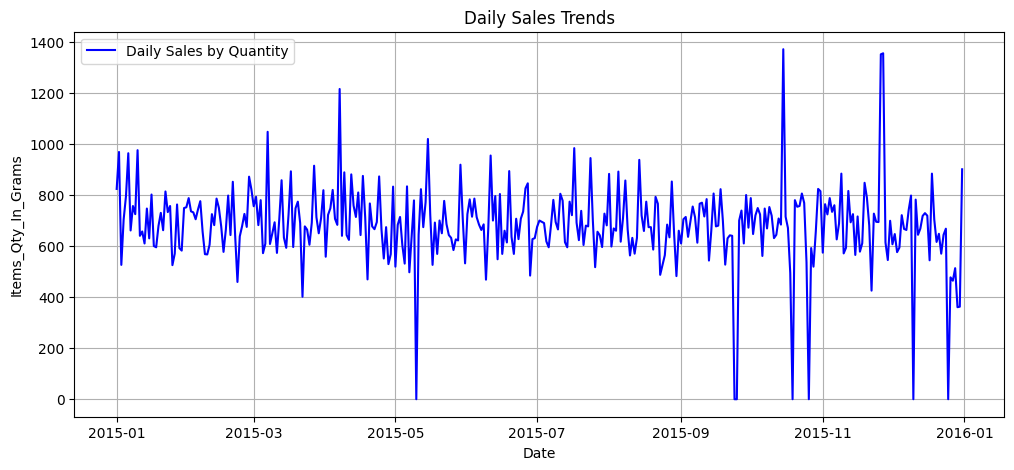

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by day (sum of sales per day)
df_daily = df.resample('D').sum()  # 'D' = daily
plt.figure(figsize=(12, 5))
plt.plot(df_daily.index, df_daily['quantity'], label="Daily Sales by Quantity", color="blue")
plt.title("Daily Sales Trends")
plt.xlabel("Date")
plt.ylabel("Items_Qty_In_Grams")
plt.legend()
plt.grid()
plt.show()

Analyze Seasonality (Monthly Sales)

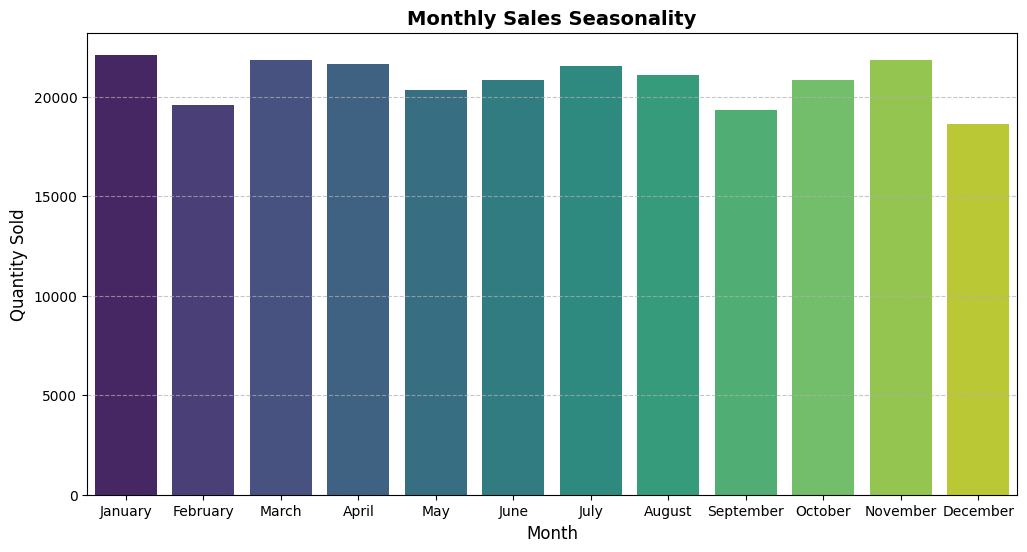

In [7]:
import calendar

# Monthly sales analysis
monthly_sales = df.groupby('Month')['quantity'].sum().sort_index()
monthly_sales.index = [calendar.month_name[m] for m in monthly_sales.index]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis", hue=monthly_sales.index, legend=False)

# Titles and labels
plt.title("Monthly Sales Seasonality", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Analyze Seasonality (Day of Week Sales)

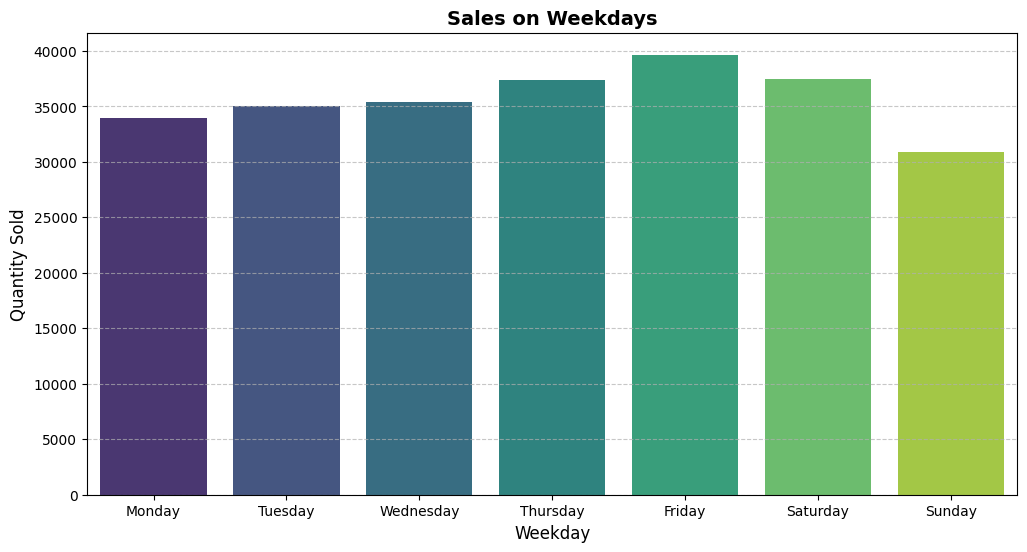

In [8]:
# Day of the week sales analysis
weekday_sales = df.groupby('day_of_week')['quantity'].sum()

# Convert weekday numbers (0-6) to names
weekday_sales.index = [calendar.day_name[d] for d in weekday_sales.index]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="viridis", hue=weekday_sales.index, legend=False)
plt.title("Sales on Weekdays", fontsize=14, fontweight="bold")
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Analyze Patterns (Weekends vs. Weekdays)

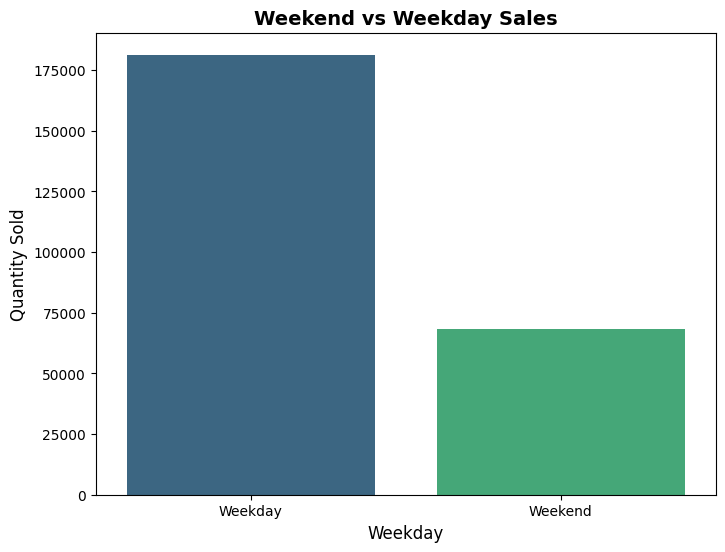

In [9]:
# Compare sales on weekends vs weekdays
weekend_sales = df.groupby('is_weekend')['quantity'].sum()
weekend_sales.index = ['Weekday', 'Weekend']

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=weekend_sales.index, y=weekend_sales.values, palette="viridis", hue=weekend_sales.index, legend=False)
plt.title("Weekend vs Weekday Sales", fontsize=14, fontweight="bold")
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.show()

Analyze Category-Wise Sales

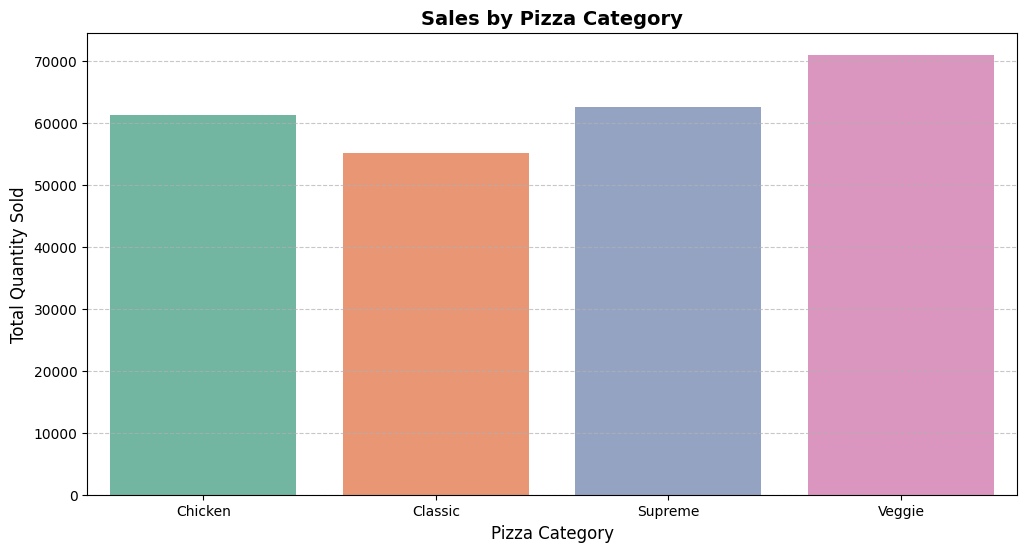

In [10]:
category_sales = df.groupby('pizza_category')['quantity'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="Set2", hue=category_sales.index, legend=False)
plt.title("Sales by Pizza Category", fontsize=14, fontweight="bold")
plt.xlabel("Pizza Category", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Top 10 Ingredients by Total Quantity Used

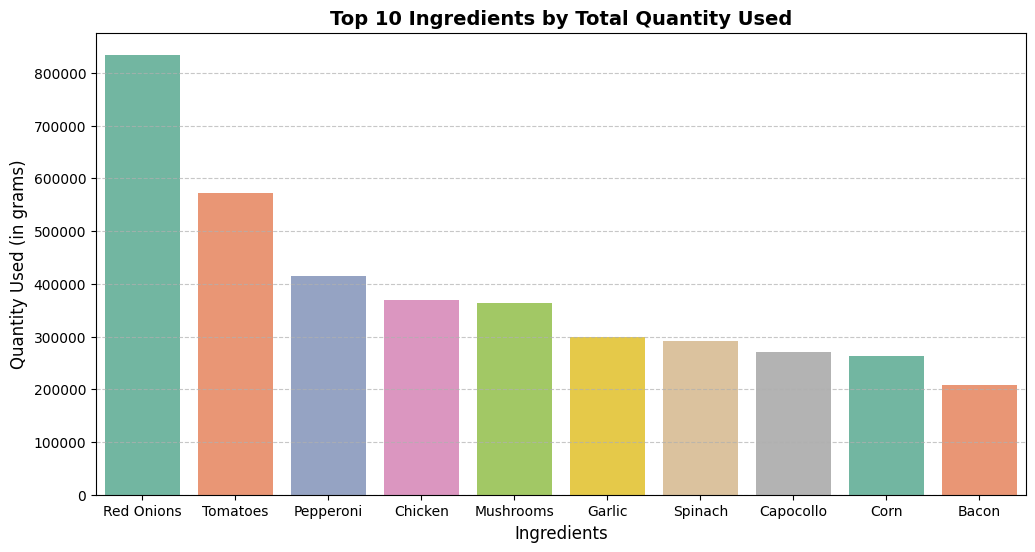

In [11]:
ingredient_usage = df.groupby('pizza_ingredients')['Items_Qty_In_Grams'].sum().sort_values(ascending=False)
ingredient_usage = ingredient_usage.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=ingredient_usage.index, y=ingredient_usage.values, palette="Set2", hue=ingredient_usage.index, legend=False)
plt.title("Top 10 Ingredients by Total Quantity Used", fontsize=14, fontweight="bold")
plt.xlabel("Ingredients", fontsize=12)
plt.ylabel("Quantity Used (in grams)", fontsize=12)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Encoding Categorical Values

In [12]:
cat_cols = df.select_dtypes('object').columns.tolist()

In [13]:
import pickle
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_encoders = {}

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Saving the encoder
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
df.head()

,pizza_id,order_id,pizza_name_id,quantity,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Year,Month,Day,Hour,Minute,Second,Items_Qty_In_Grams,day_of_week,is_weekend
date,,,,,,,,,,,,,,,,,,,
2015-01-01 11:38:36,1,1,27,1,13.25,13.25,1,1,55,12,2015,1,1,11,38,36,33.402357,3,0
2015-01-01 11:38:36,1,1,27,1,13.25,13.25,1,1,46,12,2015,1,1,11,38,36,30.000000,3,0
2015-01-01 11:38:36,1,1,27,1,13.25,13.25,1,1,36,12,2015,1,1,11,38,36,20.000000,3,0
2015-01-01 11:57:40,6,2,80,1,20.75,20.75,0,0,46,30,2015,1,1,11,57,40,45.000000,3,0
2015-01-01 11:57:40,5,2,42,1,16.00,16.00,1,3,25,17,2015,1,1,11,57,40,10.000000,3,0


In [14]:
df.to_csv('processed_data.csv')    # saving the cleaned data to a csv file